# Importing Libraries and uploading file

In [45]:
import numpy as np
import pandas as pd
import missingno as mno
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [46]:
#uploading excel file
df = pd.read_excel('Date_Fruit_Datasets.xlsx')
print(df.head())
df.shape
pd.set_option('display.max_columns',None)
df.columns

     AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0    0.9947       424428  0.7831        1.2976     0.9374       0.8750   
1    0.9974       339014  0.7795        1.2161     0.9773       0.9065   
2    0.9962       528876  0.7657        1.3150     0.9446       0.8706   
3    0.9948       418255  0.7759        1.2831     0.9458       0.8791   
4    0.9908       350797  0.7569        1.3108     0.9358       0.8707   

   SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4    MeanRR  \
0         0.0020         0.0015         0.7657 

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

# Data Cleaning

Handling missing values if any

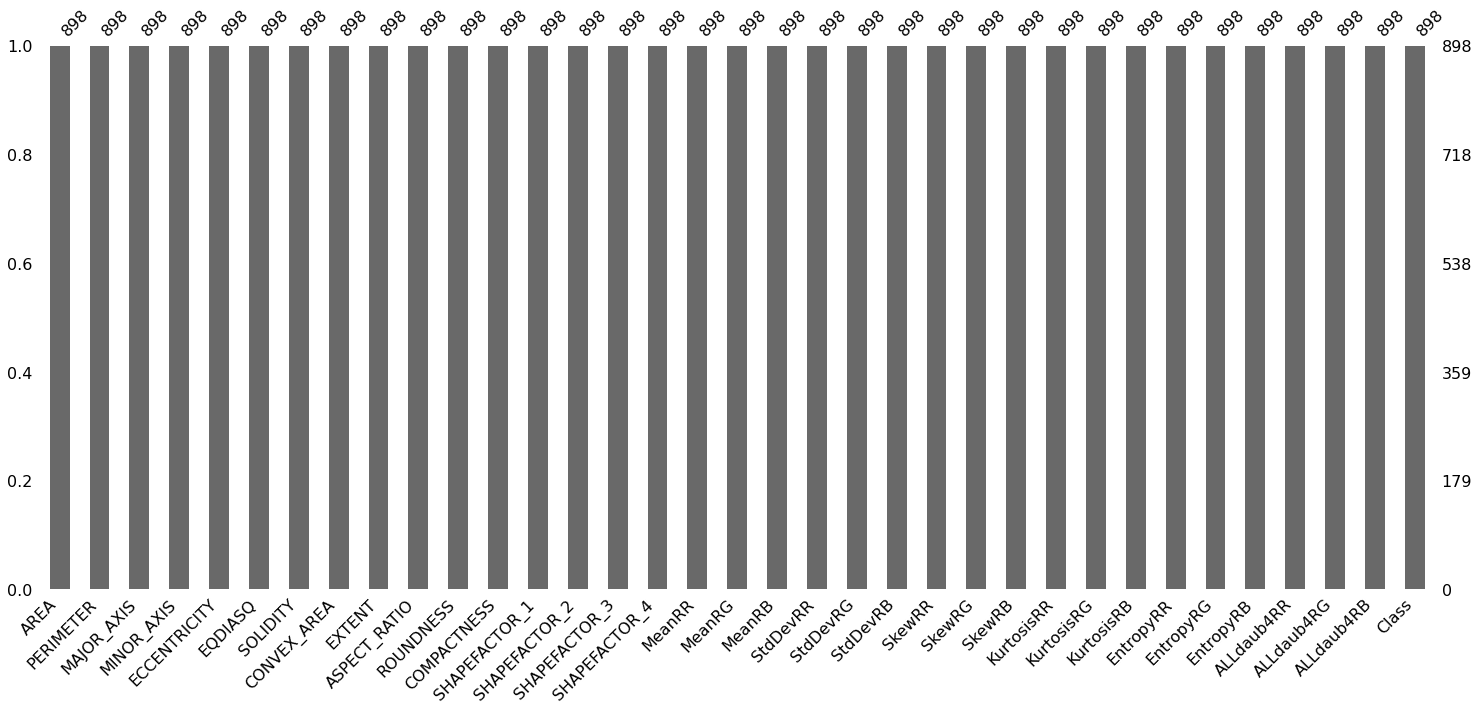

In [47]:
#Since the dataset is huge, using isnull() wouldn't be helpful.
#Therefore, to check if there are any null values, a bar graph is plotted
#If the count value shown above every column's bar is equal to the number of rows in the dataset then there are no null values  
mno.bar(df)

In [48]:
#No change in shape values after dropping NA further shows that their are no null values
df=df.dropna()
df.shape

(898, 35)

Removing Duplicates

In [49]:
df = df.drop_duplicates()
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,0.0015,0.7657,0.9936,117.4466,109.9085,95.6774,26.5152,23.0687,30.1230,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,0.0018,0.8218,0.9993,100.0578,105.6314,95.6610,27.2656,23.4952,28.1229,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,0.0018,0.0014,0.7580,0.9968,130.9558,118.5703,103.8750,29.7036,24.6216,33.9053,-0.7152,-0.1059,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,0.0016,0.7727,0.9915,86.7798,88.2531,82.3751,28.7288,24.4905,30.3955,0.4584,1.2917,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,0.0017,0.7582,0.9938,105.5484,101.8132,85.3342,30.3205,25.0291,27.1741,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,0.8658,0.8243,0.0027,0.0019,0.6794,0.9850,98.1696,86.0790,84.8254,29.6780,27.5947,26.7208,-0.2737,-0.0339,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,0.6475,0.7979,0.0023,0.0015,0.6366,0.9875,93.6238,78.2098,73.1009,23.8141,23.7356,24.1884,-0.3319,0.5663,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,0.8609,0.7613,0.0029,0.0017,0.5796,0.9945,88.2526,81.5870,81.9449,38.4674,39.3292,29.0821,0.1838,0.6385,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,0.8263,0.7697,0.0030,0.0018,0.5924,0.9609,102.4622,91.4354,91.2533,30.9960,33.4524,25.2846,0.3400,0.8228,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


Outlier Detection

In [50]:
columns = list(df.columns)
print(columns[0:-1])

['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY', 'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB', 'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB', 'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG', 'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

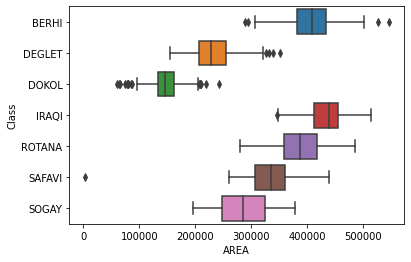

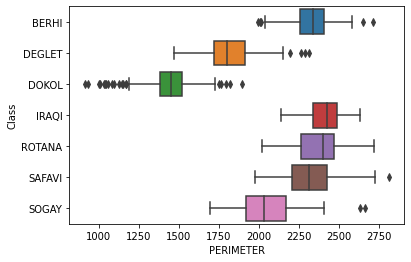

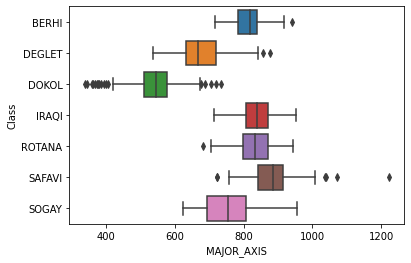

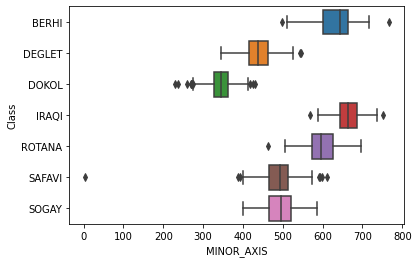

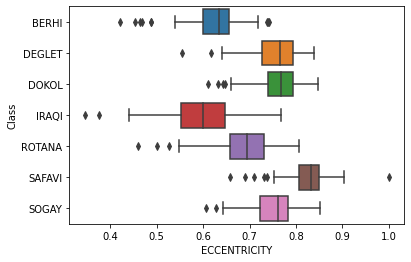

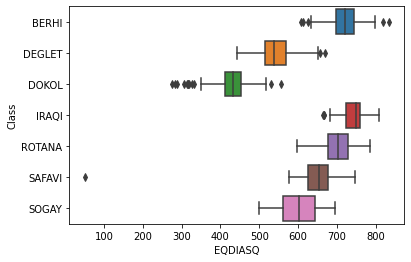

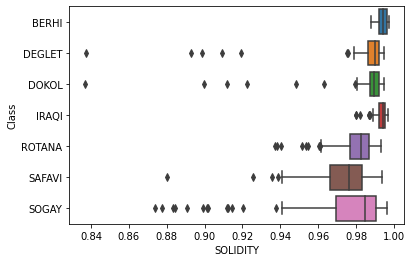

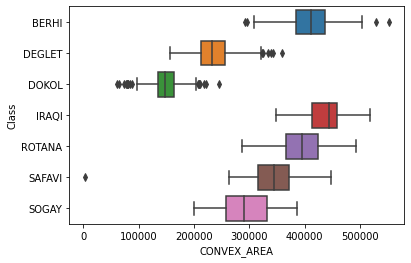

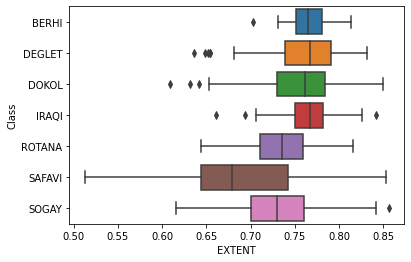

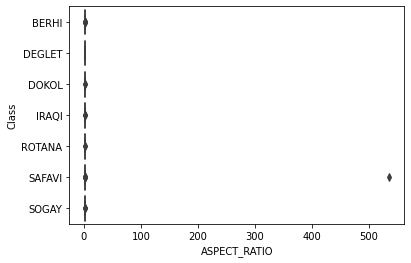

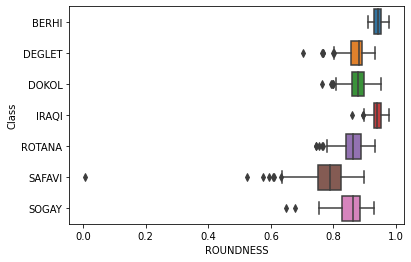

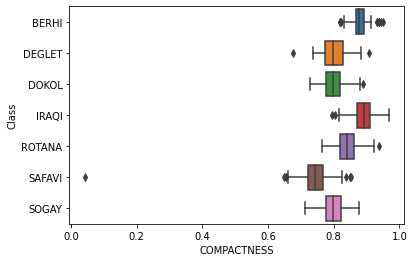

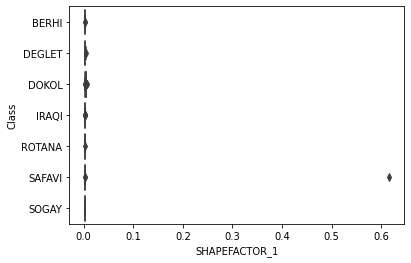

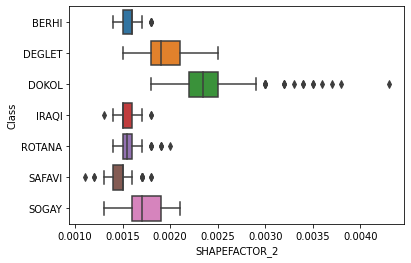

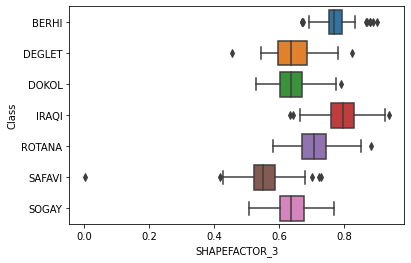

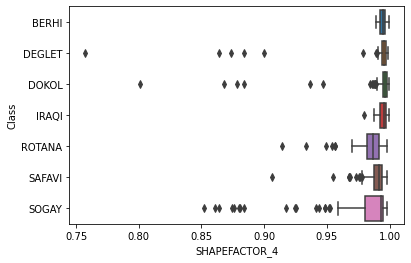

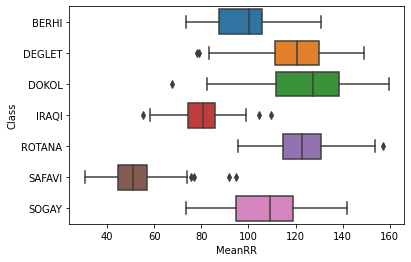

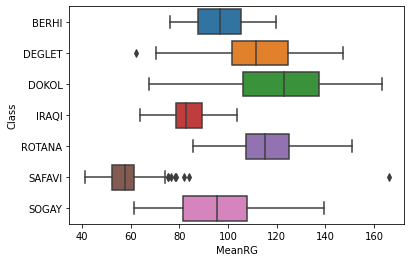

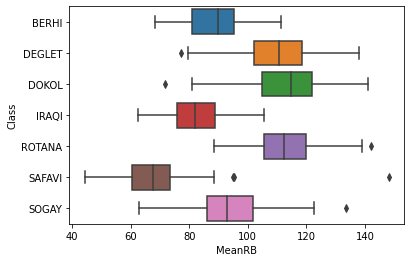

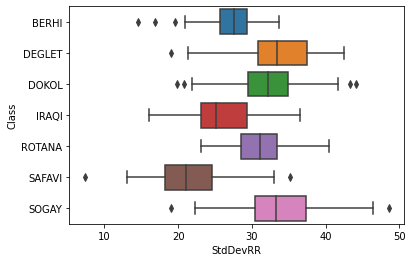

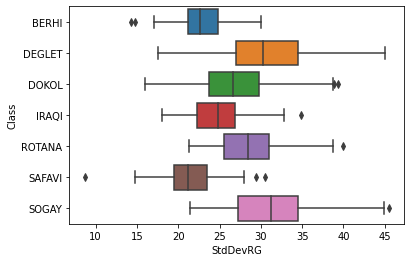

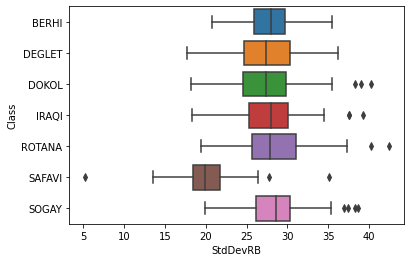

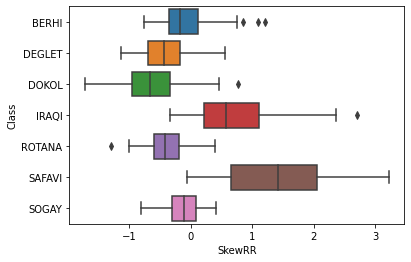

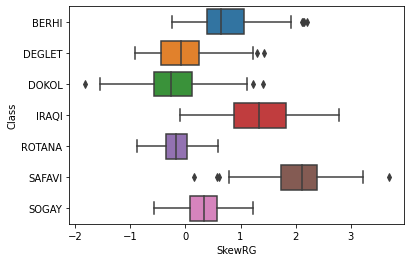

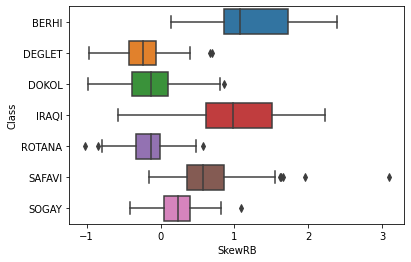

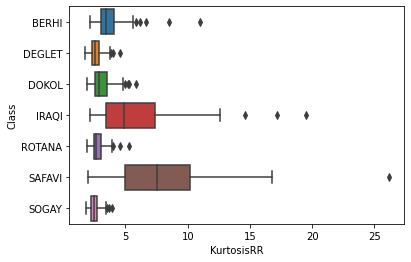

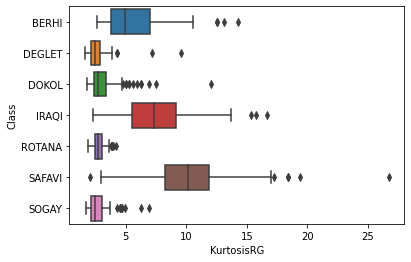

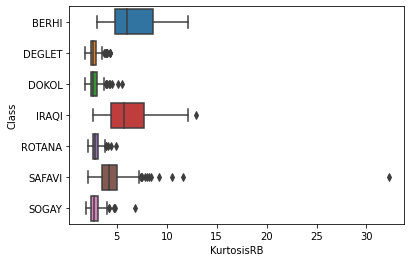

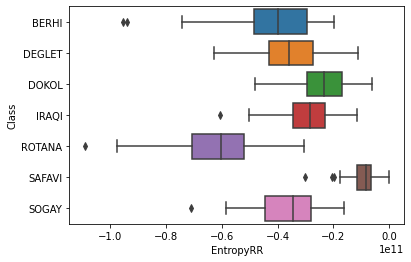

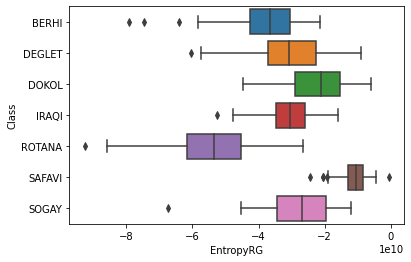

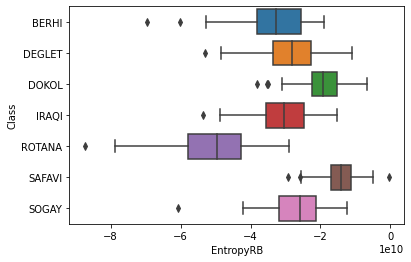

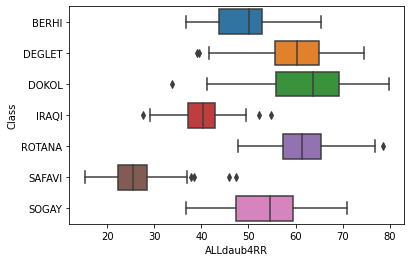

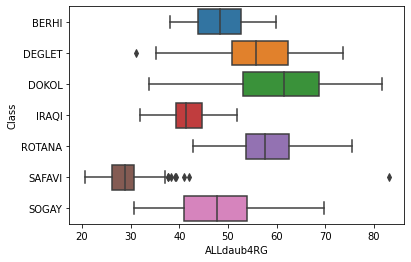

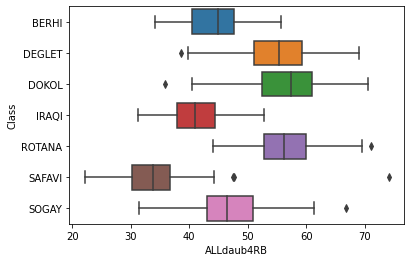

In [51]:
#Visualizing the range of values for each attribute followed by mean values and limits. 
#Useful to figure out distribution properly and check for outliers.
for column in columns[0:-1]:
    plt.figure()
    sns.boxplot(x=column,y='Class',data=df)

In [52]:
#creating a new dataframe with all columns except 'Class' column 
int_columns=columns[0:-1]
int_columns
df2=df[int_columns]
df2

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,0.0015,0.7657,0.9936,117.4466,109.9085,95.6774,26.5152,23.0687,30.1230,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,0.0018,0.8218,0.9993,100.0578,105.6314,95.6610,27.2656,23.4952,28.1229,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,0.0018,0.0014,0.7580,0.9968,130.9558,118.5703,103.8750,29.7036,24.6216,33.9053,-0.7152,-0.1059,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,0.0016,0.7727,0.9915,86.7798,88.2531,82.3751,28.7288,24.4905,30.3955,0.4584,1.2917,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,0.0017,0.7582,0.9938,105.5484,101.8132,85.3342,30.3205,25.0291,27.1741,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,0.8658,0.8243,0.0027,0.0019,0.6794,0.9850,98.1696,86.0790,84.8254,29.6780,27.5947,26.7208,-0.2737,-0.0339,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,0.6475,0.7979,0.0023,0.0015,0.6366,0.9875,93.6238,78.2098,73.1009,23.8141,23.7356,24.1884,-0.3319,0.5663,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,0.8609,0.7613,0.0029,0.0017,0.5796,0.9945,88.2526,81.5870,81.9449,38.4674,39.3292,29.0821,0.1838,0.6385,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,0.8263,0.7697,0.0030,0.0018,0.5924,0.9609,102.4622,91.4354,91.2533,30.9960,33.4524,25.2846,0.3400,0.8228,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260


In [53]:
#removing the outliers by using z-score
df2=df2[(np.abs(stats.zscore(df2))<3).all(axis=1)]
df2

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,0.0015,0.7657,0.9936,117.4466,109.9085,95.6774,26.5152,23.0687,30.1230,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,0.0018,0.8218,0.9993,100.0578,105.6314,95.6610,27.2656,23.4952,28.1229,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,0.0016,0.7727,0.9915,86.7798,88.2531,82.3751,28.7288,24.4905,30.3955,0.4584,1.2917,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,0.0017,0.7582,0.9938,105.5484,101.8132,85.3342,30.3205,25.0291,27.1741,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0.7805,1.3508,0.9493,0.8589,0.0021,0.0015,0.7376,0.9964,99.3980,90.6346,79.4735,28.2568,24.0417,32.7977,0.1189,0.9400,1.5571,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,49.7001,45.3190,39.7371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,0.8658,0.8243,0.0027,0.0019,0.6794,0.9850,98.1696,86.0790,84.8254,29.6780,27.5947,26.7208,-0.2737,-0.0339,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,0.6475,0.7979,0.0023,0.0015,0.6366,0.9875,93.6238,78.2098,73.1009,23.8141,23.7356,24.1884,-0.3319,0.5663,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,0.8609,0.7613,0.0029,0.0017,0.5796,0.9945,88.2526,81.5870,81.9449,38.4674,39.3292,29.0821,0.1838,0.6385,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,0.8263,0.7697,0.0030,0.0018,0.5924,0.9609,102.4622,91.4354,91.2533,30.9960,33.4524,25.2846,0.3400,0.8228,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260


In [54]:
#merging the new dataframe with the previous one to map them with the "Class" attribute
df1=pd.merge(df2,df)
df1.dropna()
df1

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,0.0015,0.7657,0.9936,117.4466,109.9085,95.6774,26.5152,23.0687,30.1230,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,0.0018,0.8218,0.9993,100.0578,105.6314,95.6610,27.2656,23.4952,28.1229,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,0.0016,0.7727,0.9915,86.7798,88.2531,82.3751,28.7288,24.4905,30.3955,0.4584,1.2917,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
3,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,0.0017,0.7582,0.9938,105.5484,101.8132,85.3342,30.3205,25.0291,27.1741,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
4,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0.7805,1.3508,0.9493,0.8589,0.0021,0.0015,0.7376,0.9964,99.3980,90.6346,79.4735,28.2568,24.0417,32.7977,0.1189,0.9400,1.5571,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,49.7001,45.3190,39.7371,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,0.8658,0.8243,0.0027,0.0019,0.6794,0.9850,98.1696,86.0790,84.8254,29.6780,27.5947,26.7208,-0.2737,-0.0339,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
789,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,0.6475,0.7979,0.0023,0.0015,0.6366,0.9875,93.6238,78.2098,73.1009,23.8141,23.7356,24.1884,-0.3319,0.5663,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
790,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,0.8609,0.7613,0.0029,0.0017,0.5796,0.9945,88.2526,81.5870,81.9449,38.4674,39.3292,29.0821,0.1838,0.6385,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
791,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,0.8263,0.7697,0.0030,0.0018,0.5924,0.9609,102.4622,91.4354,91.2533,30.9960,33.4524,25.2846,0.3400,0.8228,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


# Analysis task-1

Finding the largest type of date fruit in terms of area

In [55]:
N_Class=df1['Class'].unique()
print(N_Class)
print(type(N_Class))
print(df1.Class.value_counts())

['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']
<class 'numpy.ndarray'>
DOKOL     189
SAFAVI    168
ROTANA    152
DEGLET     92
SOGAY      79
IRAQI      63
BERHI      50
Name: Class, dtype: int64


In [56]:
#Finding the date with largest area or the finding the largest date
avg_area=df1.groupby('Class',as_index=False).AREA.mean() #grouping by class of dates and finding average ean of each class
print(avg_area)
max_area=avg_area.loc[avg_area['AREA']==avg_area['AREA'].max()] #finding the class with highest average area
print("The biggest type in terms of area:\n",max_area)

    Class           AREA
0   BERHI  401686.220000
1  DEGLET  236096.858696
2   DOKOL  149247.624339
3   IRAQI  434864.920635
4  ROTANA  385729.065789
5  SAFAVI  337856.166667
6   SOGAY  292145.670886
The biggest type in terms of area:
    Class           AREA
3  IRAQI  434864.920635


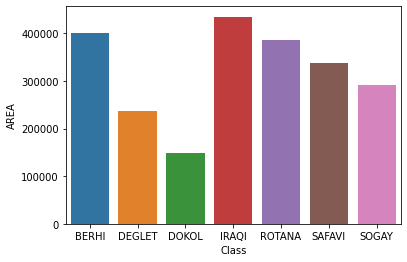

In [57]:
#visualising the average area of every class
#biggest fruit in terms of area will be the one with highest length of bar. 
sns.barplot(x=avg_area['Class'],y=avg_area['AREA'])

Finding the largest fruit in terms of area to perimter ratio

In [58]:
#Finding average perimter of all types of dates
avg_per=df1.groupby('Class',as_index=False).PERIMETER.mean() #grouping by class of dates and finding average ean of each class
print(avg_per)

    Class    PERIMETER
0   BERHI  2313.212484
1  DEGLET  1835.958242
2   DOKOL  1459.629041
3   IRAQI  2416.069341
4  ROTANA  2373.688929
5  SAFAVI  2322.297964
6   SOGAY  2059.952752


In [59]:
#Finding area to perimter ratio
area_to_per=avg_area['AREA']/avg_per['PERIMETER']
area_to_per

0    173.648648
1    128.595985
2    102.250380
3    179.988593
4    162.501944
5    145.483556
6    141.821540
dtype: float64

In [60]:
#Mapping area to primeter ratio to the class name
atp_df=pd.merge(avg_area,avg_per)
atp_df['AREA/PERIMETER']=area_to_per
print(atp_df) 

    Class           AREA    PERIMETER  AREA/PERIMETER
0   BERHI  401686.220000  2313.212484      173.648648
1  DEGLET  236096.858696  1835.958242      128.595985
2   DOKOL  149247.624339  1459.629041      102.250380
3   IRAQI  434864.920635  2416.069341      179.988593
4  ROTANA  385729.065789  2373.688929      162.501944
5  SAFAVI  337856.166667  2322.297964      145.483556
6   SOGAY  292145.670886  2059.952752      141.821540


In [61]:
#finding maximum ratio
max_ratio=atp_df.loc[atp_df['AREA/PERIMETER']==atp_df['AREA/PERIMETER'].max()]
print("Largest type of fruit in terms of area to perimeter ratio is:")
print(max_ratio['Class'])


Largest type of fruit in terms of area to perimeter ratio is:
3    IRAQI
Name: Class, dtype: object


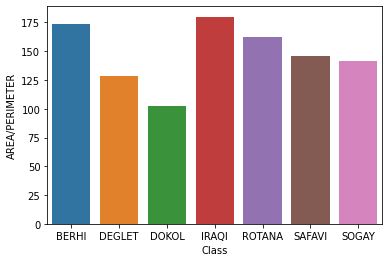

In [62]:
#Visualising the highest area to perimeter ratio
sns.barplot(x=atp_df['Class'],y=atp_df['AREA/PERIMETER'])

# Analysis Task-2 

The most round shaped fruit type

In [63]:
#set_option and display.max_columns controls how many columns to be displayed
#when it is set to null or int, all the columns will be displayed
pd.set_option('display.max_columns',None)
df1

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,0.0015,0.7657,0.9936,117.4466,109.9085,95.6774,26.5152,23.0687,30.1230,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,0.0018,0.8218,0.9993,100.0578,105.6314,95.6610,27.2656,23.4952,28.1229,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,0.0016,0.7727,0.9915,86.7798,88.2531,82.3751,28.7288,24.4905,30.3955,0.4584,1.2917,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
3,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,0.0017,0.7582,0.9938,105.5484,101.8132,85.3342,30.3205,25.0291,27.1741,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
4,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0.7805,1.3508,0.9493,0.8589,0.0021,0.0015,0.7376,0.9964,99.3980,90.6346,79.4735,28.2568,24.0417,32.7977,0.1189,0.9400,1.5571,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,49.7001,45.3190,39.7371,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,0.8658,0.8243,0.0027,0.0019,0.6794,0.9850,98.1696,86.0790,84.8254,29.6780,27.5947,26.7208,-0.2737,-0.0339,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
789,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,0.6475,0.7979,0.0023,0.0015,0.6366,0.9875,93.6238,78.2098,73.1009,23.8141,23.7356,24.1884,-0.3319,0.5663,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
790,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,0.8609,0.7613,0.0029,0.0017,0.5796,0.9945,88.2526,81.5870,81.9449,38.4674,39.3292,29.0821,0.1838,0.6385,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
791,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,0.8263,0.7697,0.0030,0.0018,0.5924,0.9609,102.4622,91.4354,91.2533,30.9960,33.4524,25.2846,0.3400,0.8228,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [64]:
#We are checking the maximum values of each and every column in the datset
maxValue=df1.max()
maxValue

AREA                  514745
PERIMETER           2718.394
MAJOR_AXIS          1070.647
MINOR_AXIS           735.891
ECCENTRICITY          0.9035
EQDIASQ             809.5639
SOLIDITY              0.9974
CONVEX_AREA           518474
EXTENT                0.8562
ASPECT_RATIO          2.3328
ROUNDNESS             0.9773
COMPACTNESS           0.9349
SHAPEFACTOR_1         0.0044
SHAPEFACTOR_2          0.003
SHAPEFACTOR_3          0.874
SHAPEFACTOR_4         0.9995
MeanRR              157.4652
MeanRG              161.0358
MeanRB              141.1264
StdDevRR             46.3493
StdDevRG             42.4283
StdDevRB             40.2708
SkewRR                2.7651
SkewRG                2.9764
SkewRB                2.0979
KurtosisRR           12.8604
KurtosisRG           16.2644
KurtosisRB            9.7957
EntropyRR        -2424508160
EntropyRG        -4791147520
EntropyRB        -6442150912
ALLdaub4RR            78.719
ALLdaub4RG           80.5215
ALLdaub4RB           70.5632
Class         

In [65]:
#Grouping the datafarme by Classes on roundenss column
#Then extracting the max roundness in every class
roundmax=df1.groupby("Class")["ROUNDNESS"].max()
roundmax

Class
BERHI     0.9773
DEGLET    0.9325
DOKOL     0.9351
IRAQI     0.9694
ROTANA    0.9314
SAFAVI    0.8974
SOGAY     0.9300
Name: ROUNDNESS, dtype: float64

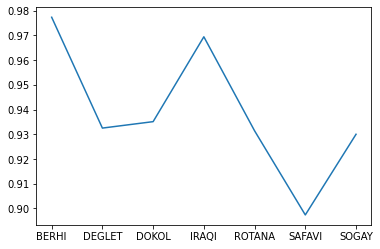

In [66]:
#plotting the data for classes versus the maximum roundness for each class
#We can observe that Berhi class dates have a better shape in terms of roundness
plt.plot(roundmax)

#Analysis Task 3

Finding which classes have the most and least elongation and width

In [67]:
#To find which fruit class have the most elongation we consider the major axis column
#Now we group the Classes on major axis column
mostElongated= df1.groupby('Class')['MAJOR_AXIS'].max()
mostElongated

Class
BERHI      913.3773
DEGLET     875.3194
DOKOL      733.3027
IRAQI      953.5176
ROTANA     943.8856
SAFAVI    1070.6470
SOGAY      953.8370
Name: MAJOR_AXIS, dtype: float64

In [68]:
#finding which class have the most elongated fruit by taking maximum of the gruping section
#It is observed that safavi have the most elongated fruits with a major axis value 1222.723
mostElongated.max()

1070.647

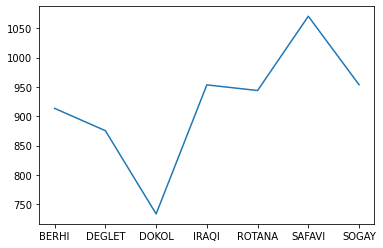

In [69]:
#In the upcomiing visualisation plot the inference can be clearly understood and we can compare to all other classes also on how its varying
plt.plot(mostElongated)

In [70]:
#To find which fruit class have the least elongation we consider the major axis column
#Now we group the Classes on major axis column and consider minimun of all
leastElongated= df1.groupby('Class')['MAJOR_AXIS'].min()
leastElongated

Class
BERHI     715.4261
DEGLET    535.5590
DOKOL     418.8293
IRAQI     713.5856
ROTANA    706.2109
SAFAVI    722.8275
SOGAY     622.2163
Name: MAJOR_AXIS, dtype: float64

In [71]:
#Finding the class with least major axis value
#It is observed that dokol class have the laest elongation which a major axis value 336.7227
leastElongated.min()

418.8293

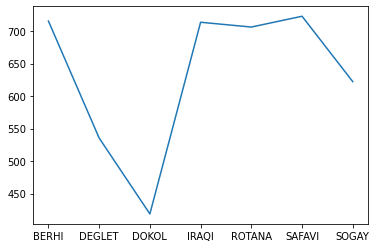

In [72]:
#In this plot we can check and compare the classes with their least major axis value
plt.plot(leastElongated)

In [73]:
#To find which fruit class have the most width we consider the minor axis column
#Now we group the Classes on minor axis column
mostWidth= df1.groupby('Class')['MINOR_AXIS'].max()
mostWidth

Class
BERHI     705.3541
DEGLET    546.0946
DOKOL     429.9135
IRAQI     735.8910
ROTANA    691.8159
SAFAVI    609.9025
SOGAY     586.2938
Name: MINOR_AXIS, dtype: float64

In [74]:
#Taking the maximum value from the data
#So the class with maximum width is berhi with a value 766.4536
mostWidth.max()

735.891

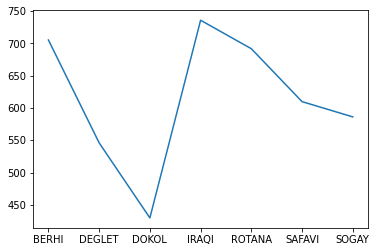

In [75]:
#In the upcomiing visualisation plot the inference can be clearly understood and we can compare to all other
#classes also on how its varying
plt.plot(mostWidth)

In [76]:
#To find which fruit class have the least elongation we consider the minor axis column
#Then take the minimum value of all
leastWidth= df1.groupby('Class')['MINOR_AXIS'].min()
leastWidth

Class
BERHI     497.8095
DEGLET    345.0351
DOKOL     292.5120
IRAQI     567.5129
ROTANA    461.9426
SAFAVI    391.8441
SOGAY     400.5577
Name: MINOR_AXIS, dtype: float64

In [77]:
leastWidth.min()

292.512

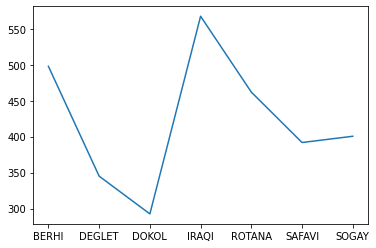

In [78]:
#Visualization plot of the classes versus the minimum minor axis values
plt.plot(leastWidth)

# Analysis Task-4

Finding the primary colour closest to the fruit colour for all fruits

In [79]:
#finding the mean of all primary colors of every typr of fruit
mean_RR=df1.groupby('Class',as_index=False).MeanRR.mean()
mean_RG=df1.groupby('Class',as_index=False).MeanRG.mean()
mean_RB=df1.groupby('Class',as_index=False).MeanRB.mean()
print(mean_RR)
print(mean_RG)
print(mean_RB)

    Class      MeanRR
0   BERHI   99.771194
1  DEGLET  118.058005
2   DOKOL  123.017785
3   IRAQI   81.611494
4  ROTANA  121.658251
5  SAFAVI   51.849755
6   SOGAY  105.932358
    Class      MeanRG
0   BERHI   97.700874
1  DEGLET  109.782626
2   DOKOL  119.848466
3   IRAQI   84.038778
4  ROTANA  114.752705
5  SAFAVI   58.175533
6   SOGAY   93.190577
    Class      MeanRB
0   BERHI   90.539278
1  DEGLET  108.491512
2   DOKOL  112.285283
3   IRAQI   82.382384
4  ROTANA  111.125753
5  SAFAVI   67.957167
6   SOGAY   92.694380


In [80]:
#pivoting these tables and making the class names as index
mean_RR=mean_RR.set_index('Class')
mean_RG=mean_RG.set_index('Class')
mean_RB=mean_RB.set_index('Class')
print(mean_RR,"\n")
print(mean_RG,"\n")
print(mean_RB,"\n")

            MeanRR
Class             
BERHI    99.771194
DEGLET  118.058005
DOKOL   123.017785
IRAQI    81.611494
ROTANA  121.658251
SAFAVI   51.849755
SOGAY   105.932358 

            MeanRG
Class             
BERHI    97.700874
DEGLET  109.782626
DOKOL   119.848466
IRAQI    84.038778
ROTANA  114.752705
SAFAVI   58.175533
SOGAY    93.190577 

            MeanRB
Class             
BERHI    90.539278
DEGLET  108.491512
DOKOL   112.285283
IRAQI    82.382384
ROTANA  111.125753
SAFAVI   67.957167
SOGAY    92.694380 



In [81]:
#merging the dataframes to have the means in one dataframe on index
mean_RGB=pd.merge(pd.merge(mean_RR,mean_RG,left_index=True,right_index=True),mean_RB,left_index=True, right_index=True)
mean_RGB

,MeanRR,MeanRG,MeanRB
Class,,,
BERHI,99.771194,97.700874,90.539278
DEGLET,118.058005,109.782626,108.491512
DOKOL,123.017785,119.848466,112.285283
IRAQI,81.611494,84.038778,82.382384
ROTANA,121.658251,114.752705,111.125753
SAFAVI,51.849755,58.175533,67.957167
SOGAY,105.932358,93.190577,92.694380


In [82]:
columns = list(mean_RGB.columns)
columns

['MeanRR', 'MeanRG', 'MeanRB']

In [83]:
#adding another column with the highest value among MeanRR, MeanRG and MeanRB
mean_RGB['Highest']=mean_RGB.max(axis=1)
mean_RGB

,MeanRR,MeanRG,MeanRB,Highest
Class,,,,
BERHI,99.771194,97.700874,90.539278,99.771194
DEGLET,118.058005,109.782626,108.491512,118.058005
DOKOL,123.017785,119.848466,112.285283,123.017785
IRAQI,81.611494,84.038778,82.382384,84.038778
ROTANA,121.658251,114.752705,111.125753,121.658251
SAFAVI,51.849755,58.175533,67.957167,67.957167
SOGAY,105.932358,93.190577,92.694380,105.932358


In [84]:
#finding the max colour
mean_RGB['max_colour']=mean_RGB[['MeanRR','MeanRB','MeanRG']].idxmax(axis=1)
mean_RGB

,MeanRR,MeanRG,MeanRB,Highest,max_colour
Class,,,,,
BERHI,99.771194,97.700874,90.539278,99.771194,MeanRR
DEGLET,118.058005,109.782626,108.491512,118.058005,MeanRR
DOKOL,123.017785,119.848466,112.285283,123.017785,MeanRR
IRAQI,81.611494,84.038778,82.382384,84.038778,MeanRG
ROTANA,121.658251,114.752705,111.125753,121.658251,MeanRR
SAFAVI,51.849755,58.175533,67.957167,67.957167,MeanRB
SOGAY,105.932358,93.190577,92.694380,105.932358,MeanRR


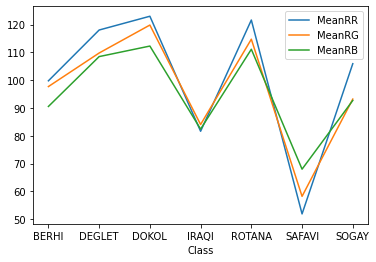

In [85]:
#plotting graph
mean_RGB.plot(y=['MeanRR','MeanRG','MeanRB'])